### Задание.

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
1. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
1. Разделите данные на выборку для обучения и тестирования
1. Постройте модель LDA
1. Визуализируйте предсказания для тестовой выборки и центры классов
1. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
1. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию 

In [40]:
from sklearn.datasets import load_iris

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [42]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

C:\Users\SERGEY~1\AppData\Local\Temp/ipykernel_8972/226866674.py:6: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap=cmap)


In [43]:
iris_df = load_iris()

In [44]:
# Методы, доступные для набора данных
print(dir(iris_df))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [45]:
# Признаки
print(iris_df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [46]:
# Метки
print(iris_df.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [47]:
# Имена меток
print(iris_df.target_names)

['setosa' 'versicolor' 'virginica']


In [48]:
print(iris_df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [53]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris_df.data, columns=iris_df.feature_names)
data_class = iris_df.target

In [54]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [55]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [56]:
lda = LinearDiscriminantAnalysis()

In [57]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [58]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 0, 2, 2, 0, 1, 1])

In [59]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [60]:
result

,0,1
0,1,1
1,1,1
2,0,0
3,1,1
4,2,2
5,2,2
6,1,1
7,1,1
8,2,2
9,0,0


In [61]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test, lda.predict(X_test))

1.0

In [63]:
# коэффициенты дискриминатных линий
lda.coef_

array([[  7.22388349,   9.0123674 , -18.89221681, -14.56644997],
       [ -1.95932282,  -3.83214747,   6.29877132,   1.95575826],
       [ -5.85100957,  -6.057939  ,  14.25080125,  13.58321626]])

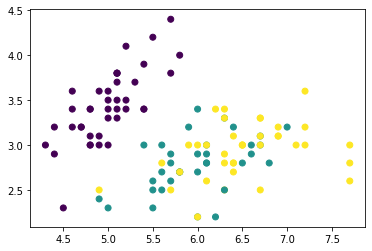

In [64]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [65]:
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 1]  # Sepal Width

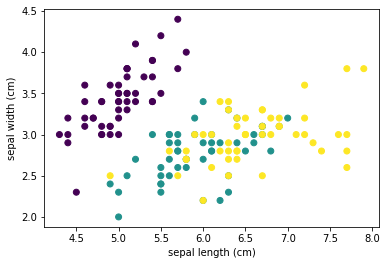

In [66]:
# Построение
plt.xlabel(iris_df.feature_names[0])
plt.ylabel(iris_df.feature_names[1])
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

### Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [24]:
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans

In [67]:
# Описываем модель
model = KMeans(n_clusters=3)

In [68]:
# Проводим моделирование
model.fit(iris_df.data)

KMeans(n_clusters=3)

In [69]:
# Предсказание на единичном примере
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

In [70]:
# Предсказание на всем наборе данных
all_predictions = model.predict(iris_df.data)

In [71]:
# Выводим предсказания
print(predicted_label)
print(all_predictions)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
